# Data Understanding

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
url = '/content/drive/MyDrive/Kelompok 1 Grup 4/Datasets/dataset Padi baru.xlsx'
df = pd.read_excel(url)
df = pd.DataFrame(df)
df.head()

,provinsi,kode_provinsi,tahun,luas panen (ha),produktivitas (ku/ha),produksi (ton),jumlah penduduk,luas provinsi (ha),produksi beras (ton),proyeksi konsumsi rumah tangga(ton),surplus/ defisit(ton),surplus/ defisit(%)*,harga beras(Rp),suhu,curah hujan (mm),penyinaran matahari (%)
0,ACEH,11,2018,329515.78,56.49,1861567.10,5243400,5795600,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,254.76,60.18
1,ACEH,11,2019,310012.46,55.30,1714437.60,5316300,5795600,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,135.34,65.74
2,ACEH,11,2020,317869.41,55.28,1757313.07,5274900,5795600,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,NaN,62.50
3,ACEH,11,2021,297058.38,55.03,1634639.60,5333700,5795600,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,NaN,65.00
4,ACEH,11,2022,271750.20,55.55,1509456.00,5407900,5683909,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,NaN,63.75


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provinsi                             170 non-null    object 
 1   kode_provinsi                        170 non-null    int64  
 2   tahun                                170 non-null    int64  
 3   luas panen (ha)                      170 non-null    float64
 4   produktivitas (ku/ha)                170 non-null    float64
 5   produksi (ton)                       170 non-null    float64
 6   jumlah penduduk                      170 non-null    int64  
 7   luas provinsi (ha)                   170 non-null    int64  
 8   produksi beras (ton)                 170 non-null    float64
 9   proyeksi konsumsi rumah tangga(ton)  170 non-null    float64
 10  surplus/ defisit(ton)                170 non-null    float64
 11  surplus/ defisit(%)*            

In [170]:
df.shape

(170, 16)

In [171]:
new_columns = {'luas panen (ha)': 'luas_panen', 
               'produktivitas (ku/ha)': 'produktivitas',
               'produksi (ton)': 'produksi',
               'jumlah penduduk ': 'jumlah_penduduk',
               'luas provinsi (ha)': 'luas_provinsi',
               'produksi beras (ton)': 'produksi_beras',
               'proyeksi konsumsi rumah tangga(ton)': 'konsumsi_rumah_tangga',
               'surplus/ defisit(ton)': 'surplus_defisit',
               'surplus/ defisit(%)*': 'presentase_surplus_defisit',
               'harga beras(Rp)': 'harga_beras',
               'curah hujan (mm)': 'curah_hujan',
               'penyinaran matahari (%)': 'penyinaran_matahari'}
df = df.rename(columns=new_columns)

In [172]:
df.isnull().sum()

provinsi                        0
kode_provinsi                   0
tahun                           0
luas_panen                      0
produktivitas                   0
produksi                        0
jumlah_penduduk                 0
luas_provinsi                   0
produksi_beras                  0
konsumsi_rumah_tangga           0
surplus_defisit                 0
presentase_surplus_defisit      0
harga_beras                     0
suhu                            0
curah_hujan                   126
penyinaran_matahari             0
dtype: int64

In [173]:
df.isna().sum()

provinsi                        0
kode_provinsi                   0
tahun                           0
luas_panen                      0
produktivitas                   0
produksi                        0
jumlah_penduduk                 0
luas_provinsi                   0
produksi_beras                  0
konsumsi_rumah_tangga           0
surplus_defisit                 0
presentase_surplus_defisit      0
harga_beras                     0
suhu                            0
curah_hujan                   126
penyinaran_matahari             0
dtype: int64

In [174]:
df1 = df.drop(['provinsi', 'kode_provinsi', 'tahun', 'luas_provinsi', 'curah_hujan'], axis=1)
df1.head()

,luas_panen,produktivitas,produksi,jumlah_penduduk,produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,penyinaran_matahari
0,329515.78,56.49,1861567.10,5243400,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,60.18
1,310012.46,55.30,1714437.60,5316300,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,65.74
2,317869.41,55.28,1757313.07,5274900,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,62.50
3,297058.38,55.03,1634639.60,5333700,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,65.00
4,271750.20,55.55,1509456.00,5407900,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,63.75


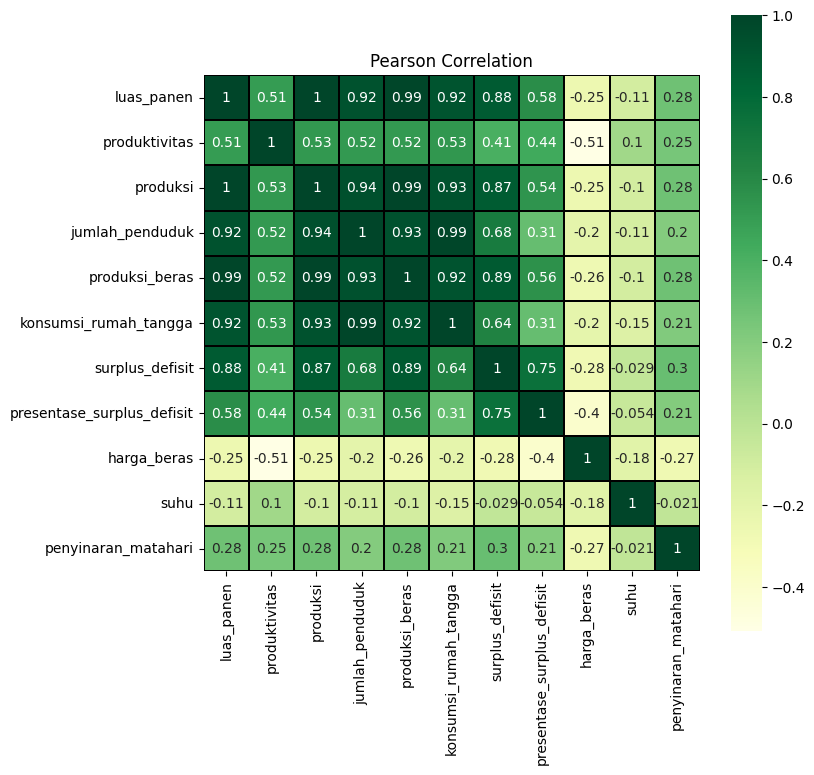

In [175]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Pearson Correlation')
sns.heatmap(df1.astype('float').corr(), linewidths=0.25, vmax=1.0, 
            square=True, cmap='YlGn', linecolor='black', annot=True)
plt.show()

# Data Preparation

In [176]:
df1.isnull().sum()

luas_panen                    0
produktivitas                 0
produksi                      0
jumlah_penduduk               0
produksi_beras                0
konsumsi_rumah_tangga         0
surplus_defisit               0
presentase_surplus_defisit    0
harga_beras                   0
suhu                          0
penyinaran_matahari           0
dtype: int64

In [177]:
# Input Variabel x
x = df[['luas_panen', 'produktivitas', 'produksi',  'jumlah_penduduk', 'produksi_beras', 'konsumsi_rumah_tangga', 'surplus_defisit', 'presentase_surplus_defisit', 'suhu', 'penyinaran_matahari']]

# Target Variabel y
y = df['produksi']

# Pemodelan Data

In [178]:
#Split Training and Testing

from sklearn.model_selection import train_test_split #import train_test_split function 
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [179]:
# Split aata Testing & Training 

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

## Model Linier Regression

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
ln = LinearRegression()

# Training Model

# Memodelkan data
model_ln = ln.fit(x_train, y_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

In [182]:
from sklearn import metrics

In [183]:
# Nilai R2
print('R Square :', metrics.r2_score(y_test, pred_ln))

R Square : 1.0


In [184]:
# Nilai MAPE
def mape(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE :', mape(y_test,pred_ln))

MAPE : 2.8187144000004256e-12


## ANN (Artificial Neural Network)

In [185]:
from sklearn.neural_network import MLPRegressor

In [186]:
# ReLU : fungsi aktivasi untuk memungkinkan model menyelesaikan masalah non linier
# ReLU (Rectified Linear Unit)
mlp = MLPRegressor()

# Memodelkan Data Menggunakan Algoritma Decision Tree
model_mlp = mlp.fit(x_train, y_train)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(x_test)

In [187]:
# Nilai R^2
print('R Square :', metrics.r2_score(y_test,pred_mlp))

R Square : 0.9127243069356525


In [188]:
# Membuat Script MAPE
def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y_test,pred_mlp))

MAPE : 2691.529969484887


# Implementasi Model

In [189]:
x1 = df[['luas_panen', 'produktivitas', 'produksi',  'jumlah_penduduk', 'produksi_beras', 'konsumsi_rumah_tangga', 'surplus_defisit', 'presentase_surplus_defisit', 'suhu', 'penyinaran_matahari']]

In [190]:
prediction = model_mlp.predict(x1)
prediction

array([ 1726732.16857568,  1688434.73430863,  1700726.78153476,
        1645969.70812036,  1579791.58908355,   935162.61212285,
         917724.68708685,   884511.00263985,   930776.91353151,
         966040.1903504 ,  2599032.22556204,  2586209.89438152,
        2571499.59052636,  2550178.64814413,  2658643.74298456,
         410269.93503493,   435166.71540214,   436969.01480628,
         427479.77843184,   432676.39305976,   804967.86328756,
         857368.10436374,   821189.94647763,   840213.39720663,
         848968.02746673,  1361444.78928687,  1484184.19244479,
        1492151.04412315,  1483299.16897698,  1468213.16196385,
         292862.41674808,   287654.57049003,   284395.25802945,
         289550.63291644,   294935.04232661,   730701.35979918,
         668915.5558809 ,   711234.65640831,   663144.2431959 ,
         648612.4234865 , 11827057.13976017, 11979296.35865084,
       11814341.68568338, 11901345.32551155, 12069284.46226065,
       10583380.97256209, 10349106.58312

In [191]:
df_result = pd.DataFrame({'Prediction' : prediction}).round(2)
df_result.head()

,Prediction
0,1726732.17
1,1688434.73
2,1700726.78
3,1645969.71
4,1579791.59


In [192]:
# Menggabungkan Data Frame hasil prediksi dengan data frame input variabel
df_pred_ho = pd.concat([df,df_result], sort=True, axis=1)
df_pred_ho.head()

,provinsi,kode_provinsi,tahun,luas_panen,produktivitas,produksi,jumlah_penduduk,luas_provinsi,produksi_beras,konsumsi_rumah_tangga,surplus_defisit,presentase_surplus_defisit,harga_beras,suhu,curah_hujan,penyinaran_matahari,Prediction
0,ACEH,11,2018,329515.78,56.49,1861567.10,5243400,5795600,1066890.0,557210.000000,509680.000000,91.470002,10182,27.08,254.76,60.18,1726732.17
1,ACEH,11,2019,310012.46,55.30,1714437.60,5316300,5795600,982570.0,443379.000000,539191.000000,121.609503,11134,26.90,135.34,65.74,1688434.73
2,ACEH,11,2020,317869.41,55.28,1757313.07,5274900,5795600,1007143.0,455749.000000,551394.000000,120.986332,11093,26.50,NaN,62.50,1700726.78
3,ACEH,11,2021,297058.38,55.03,1634639.60,5333700,5795600,941688.0,472355.000000,469333.000000,99.360227,9428,26.80,NaN,65.00,1645969.71
4,ACEH,11,2022,271750.20,55.55,1509456.00,5407900,5683909,873975.0,516389.279133,357585.720867,69.247317,10883,26.60,NaN,63.75,1579791.59


In [193]:
df_pred_ho['Prediction'].sum()

338624185.59000003

In [194]:
df1['produksi'].sum()

277618039.37

In [195]:
df_comp = df_pred_ho[['produksi', 'Prediction']]
df_comp

,produksi,Prediction
0,1861567.10,1726732.17
1,1714437.60,1688434.73
2,1757313.07,1700726.78
3,1634639.60,1645969.71
4,1509456.00,1579791.59
...,...,...
165,2108284.72,3088673.35
166,2078901.59,3160920.39
167,2040500.19,3165577.72
168,2004142.51,3153913.43


## Pemodelan ARIMA

In [202]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
df_1 = df.groupby('tahun')\
                .agg(total_prod = ('produksi', 'sum'),
                total_luas_panen = ('luas_panen', 'mean'),
                total_krt = ('konsumsi_rumah_tangga', 'sum'),
                total_supdef = ('presentase_surplus_defisit', 'mean'),
                     
                     )
                
df_1

,total_prod,total_luas_panen,total_krt,total_supdef
tahun,,,,
2018,59200533.72,334645.130588,2.504300e+07,7.762802
2019,54604033.34,314055.504412,2.054333e+07,6.388920
2020,54649202.24,313449.263529,2.088212e+07,14.095629
2021,54415294.22,306229.447647,2.205964e+07,2.416405
2022,54748975.85,307488.769412,2.411610e+07,-1.474052


<Axes: xlabel='tahun'>

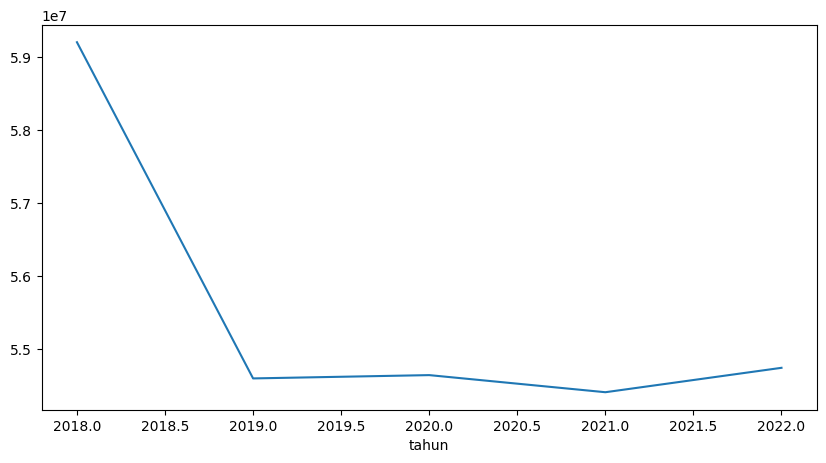

In [204]:
df_1['total_prod'].plot(figsize=(10,5))

Check For Stationarity

In [205]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF ", dftest[0])
  print("2. P-Value ", dftest[1])
  print("3. Num Of Lags ", dftest[2])
  print("4. Num Of Observations Uses For ADF Regression and Critical Values Calulations ", dftest[3])
  print("5. Critical Values ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [206]:
ad_test(df_1['total_prod'])

1. ADF  -23.577355529722652
2. P-Value  0.0
3. Num Of Lags  0
4. Num Of Observations Uses For ADF Regression and Critical Values Calulations  4
5. Critical Values 
	 1% :  -7.355440625
	 5% :  -4.474365000000001
	 10% :  -3.1269325


Figure Out Order for ARIMA Model

In [208]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [210]:
stepwise_fit = auto_arima(df_1['total_prod'], trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=162.451, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1291.595, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.518, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.098 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -79.226
Date:                Mon, 12 Jun 2023   AIC                            162.451
Time:                        07:39:51   BIC                            161.670
Sample:                             0   HQIC                           160.355
                                  - 5                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.552e+07   8.29e+06      6.697      0.000    3.93e+07    7.18e+07
sigma2      3.392e+12   2.04e+13      0.166      0.868   -3.67e+13    4.34e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.85
Prob(Q):                              0.90   Prob(JB):                         0.40
Heteroskedasticity (H):               0.13   Skew:                             1.49
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
from statsmodels.tsa.arima.model import ARIMA

Split Data into Training and Testing

In [221]:
print(df_1.shape)
train=df_1.iloc[:-3]
test=df_1.iloc[-3:]
print(train.shape, test.shape)

(5, 4)
(2, 4) (3, 4)


Train Model

In [222]:
 model = ARIMA(train['total_prod'], order=(1,0,0))
 model = model.fit()
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             total_prod   No. Observations:                    2
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -31.756
Date:                Mon, 12 Jun 2023   AIC                             69.512
Time:                        07:43:57   BIC                             65.591
Sample:                             0   HQIC                            61.312
                                  - 2                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.69e+07    1.3e-06   4.37e+13      0.000    5.69e+07    5.69e+07
ar.L1         -0.6180      1.851     -0.334      0.738      -4.246       3.010
sigma2      5.282e+12   1.08e-13   4.88e+25      0.000    5.28e+12    5.28e+12
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+42. Standard errors may be unstable.
"""

Membuat Predictiins pada Test Set

In [223]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)
#pred.index=df.index[start:end+1]
#print(pred)

2    5.832267e+07
3    5.602444e+07
4    5.744482e+07
Name: predicted_mean, dtype: float64


<Axes: xlabel='tahun'>

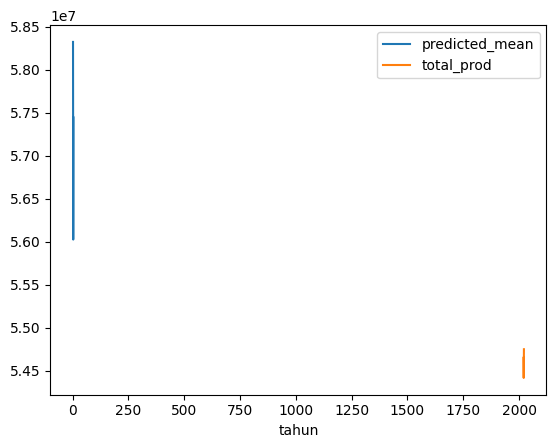

In [224]:
pred.plot(legend=True)
test['total_prod'].plot(legend=True)

In [225]:
test['total_prod'].mean()

54604490.77

In [226]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['total_prod']))
print(rmse)

2789941.2795368754


In [227]:
model2 = ARIMA(df_1['total_prod'], order=(1,0,0))
model2 = model2.fit()
df_1.tail()

,total_prod,total_luas_panen,total_krt,total_supdef
tahun,,,,
2018,59200533.72,334645.130588,2.504300e+07,7.762802
2019,54604033.34,314055.504412,2.054333e+07,6.388920
2020,54649202.24,313449.263529,2.088212e+07,14.095629
2021,54415294.22,306229.447647,2.205964e+07,2.416405
2022,54748975.85,307488.769412,2.411610e+07,-1.474052


For Future Dates

In [228]:
start_year = 2023
end_year = 2028

index_future_years = pd.date_range(start=str(start_year), end=str(end_year), freq='Y')

pred = model2.predict(start=len(df_1), end=len(df_1)+len(index_future_years)-1, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_years

print(pred)

2023-12-31    5.567944e+07
2024-12-31    5.549226e+07
2025-12-31    5.552991e+07
2026-12-31    5.552234e+07
2027-12-31    5.552386e+07
Freq: A-DEC, Name: ARIMA Predictions, dtype: float64


<Axes: >

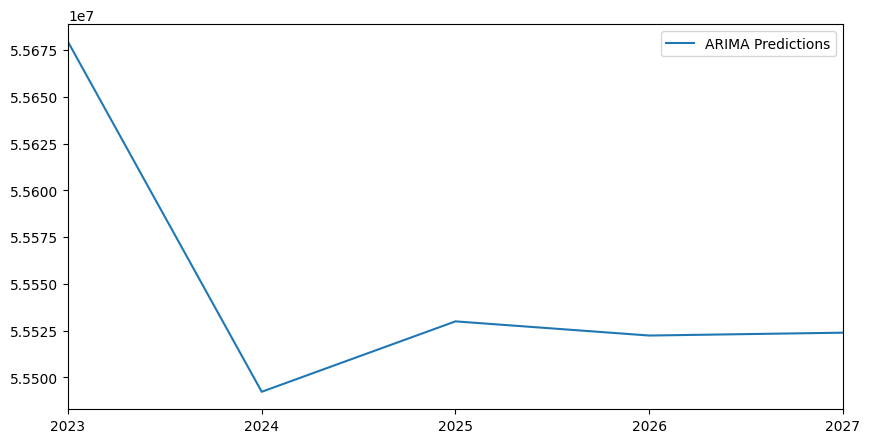

In [230]:
pred.plot(figsize=(10,5),legend=True)